In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df= pd.read_csv('rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


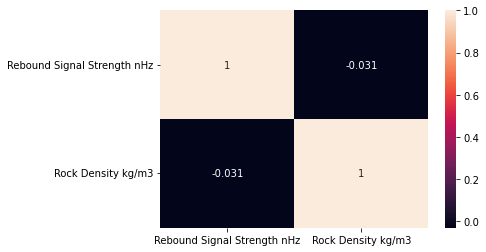

In [2]:
sns.heatmap(df.corr(),annot= True);

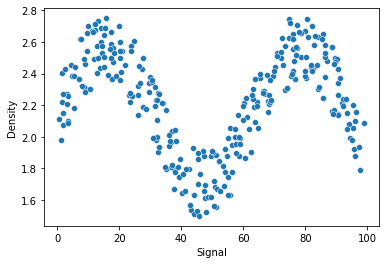

In [2]:
df.columns = ['Signal','Density']
sns.scatterplot(x='Signal', y= 'Density' , data = df);

In [3]:
X = df. drop ('Density', axis = 1).values.reshape(-1,1)
y = df['Density']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)
lin_pred = lin_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,lin_pred))
MAE = mean_absolute_error(y_test,lin_pred)
MAE

0.2369211828242142

In [7]:
RMSE

0.29280140172610514

In [8]:
lin_pred

array([2.23677119, 2.20970069, 2.22783457, 2.22977621, 2.2217074 ,
       2.20554045, 2.21733989, 2.23793703, 2.22927442, 2.23668475,
       2.21906301, 2.20614184, 2.21549894, 2.21832078, 2.21081993,
       2.23266776, 2.23121143, 2.23531968, 2.22855625, 2.2282293 ,
       2.23735453, 2.22609925, 2.23174767, 2.23534457, 2.21719859,
       2.21530785, 2.21919176, 2.22086182, 2.2079445 , 2.21011411,
       2.21129521, 2.21563332, 2.20952651, 2.21953688, 2.22584566,
       2.21915351, 2.23550111, 2.22447941, 2.22706067, 2.21412205,
       2.21325758, 2.22962443, 2.21557876, 2.23168476, 2.21201089,
       2.22977892, 2.21320954, 2.22251306, 2.2317693 , 2.2205388 ,
       2.23461924, 2.21455213, 2.21148436, 2.21004977, 2.21524109,
       2.21534935, 2.21860404, 2.22323015, 2.22126499, 2.20696345,
       2.23072186, 2.22147971, 2.23419107, 2.21677029, 2.21284061,
       2.22852663, 2.20793571, 2.20611642, 2.23753635, 2.20631527,
       2.2257516 , 2.22817828, 2.23703581, 2.22493841, 2.21559

In [9]:
y_test

176    2.179775
250    2.621238
12     2.231671
16     2.320837
258    1.908089
         ...   
282    2.236675
242    2.567965
119    2.342038
57     2.056288
37     2.309545
Name: Density, Length: 90, dtype: float64

In [4]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt
def run_model(model,X_train, y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,lin_pred))
    MAE = mean_absolute_error(y_test,lin_pred)
    print(f'MAE: {MAE}')
    print(f'RMSE: {RMSE}')
    signal_range = np. arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    plt.figure(figsize= (10,4), dpi =200)
    sns.scatterplot(x= 'Signal', y = 'Density', data = df,color = 'black')
    plt.plot(signal_range,signal_preds)


MAE: 0.2369211828242142
RMSE: 0.29280140172610514


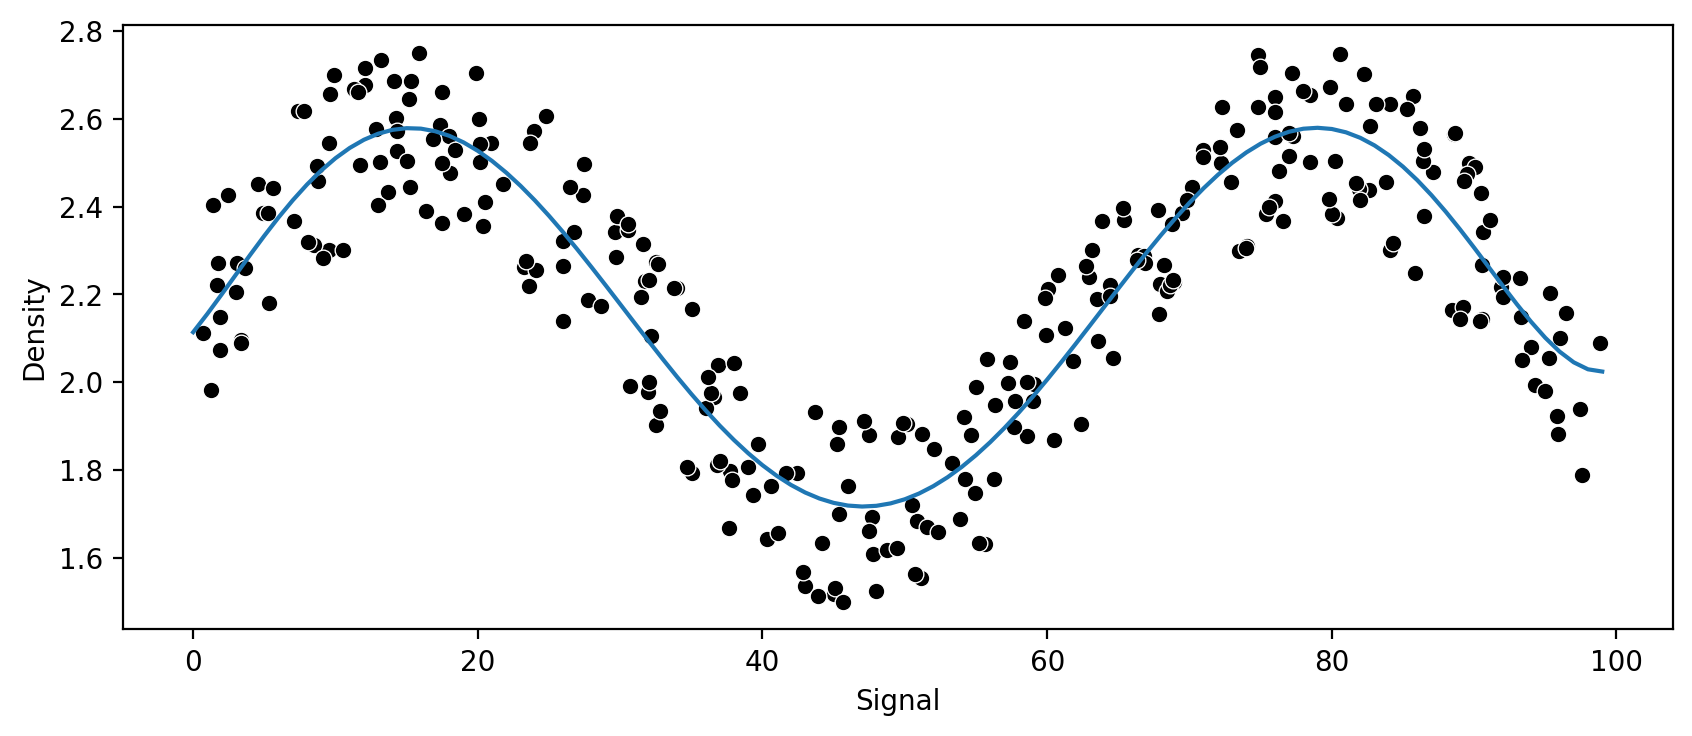

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(PolynomialFeatures(degree = 6), LinearRegression())
# model = LinearRegression()
run_model(pipe,X_train, y_train,X_test,y_test)

MAE: 0.2369211828242142
RMSE: 0.29280140172610514
MAE: 0.2369211828242142
RMSE: 0.29280140172610514
MAE: 0.2369211828242142
RMSE: 0.29280140172610514


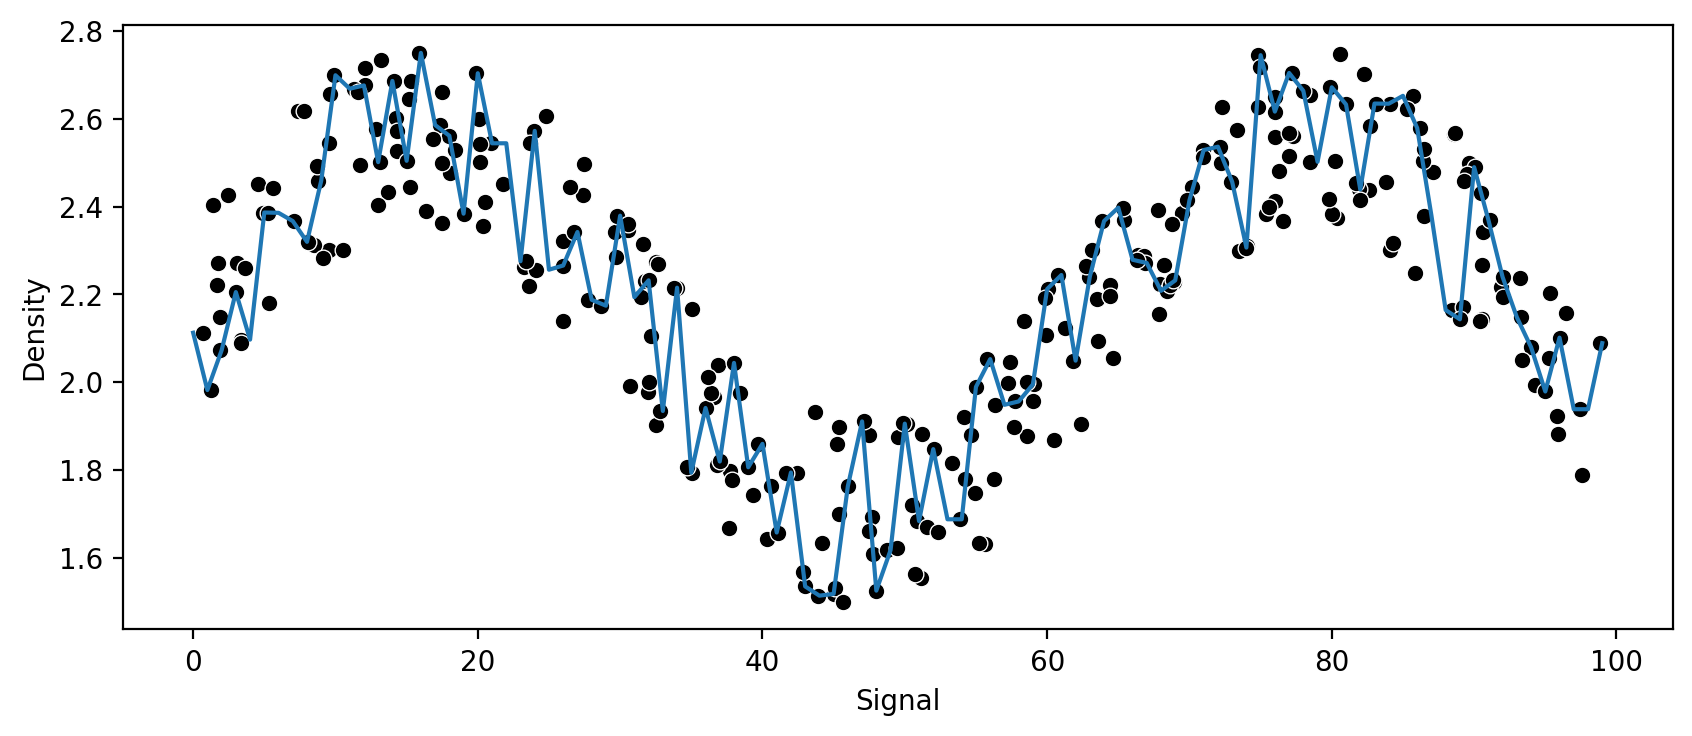

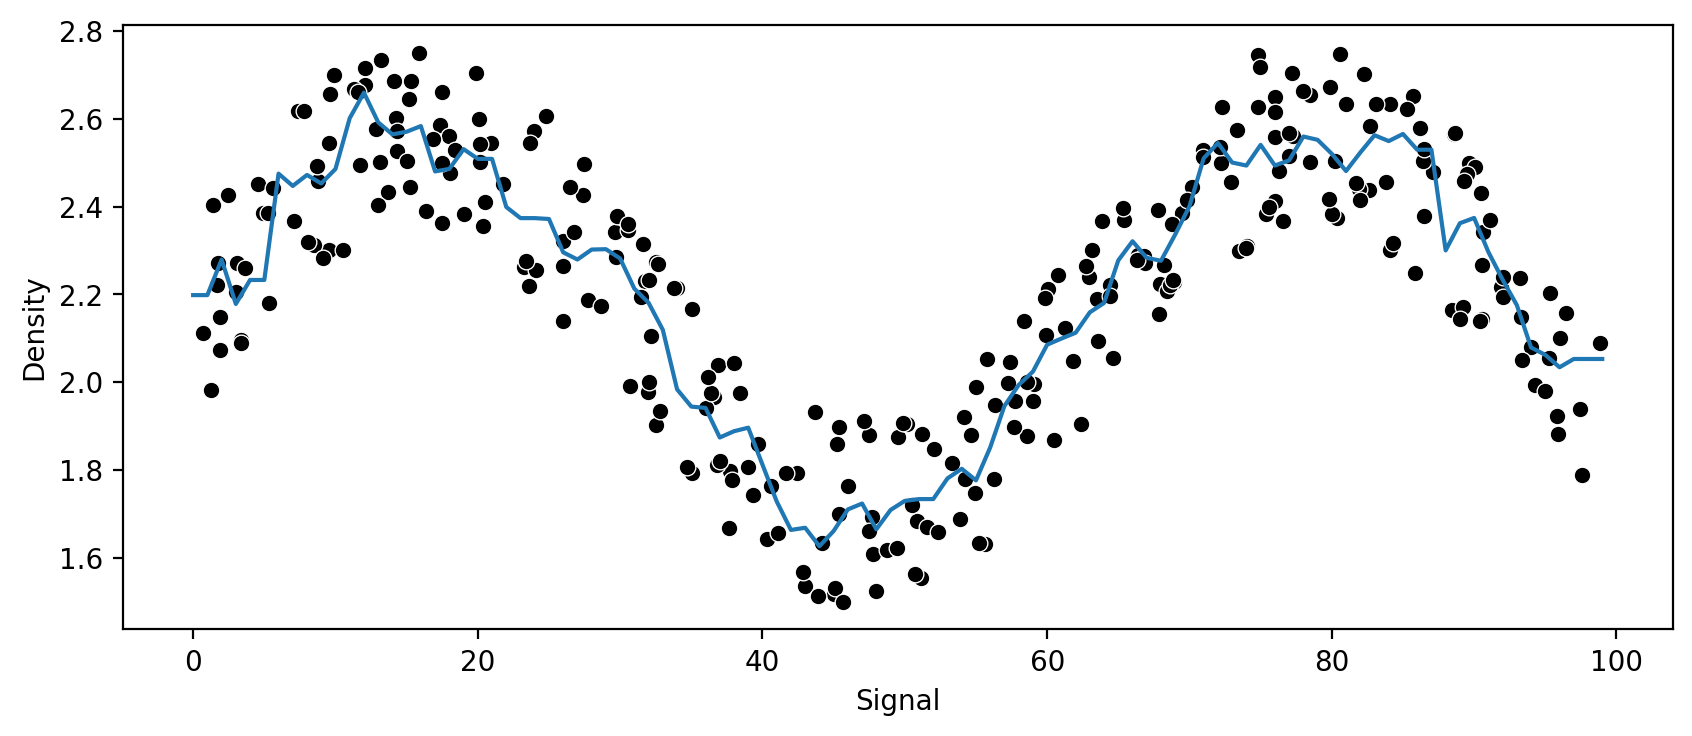

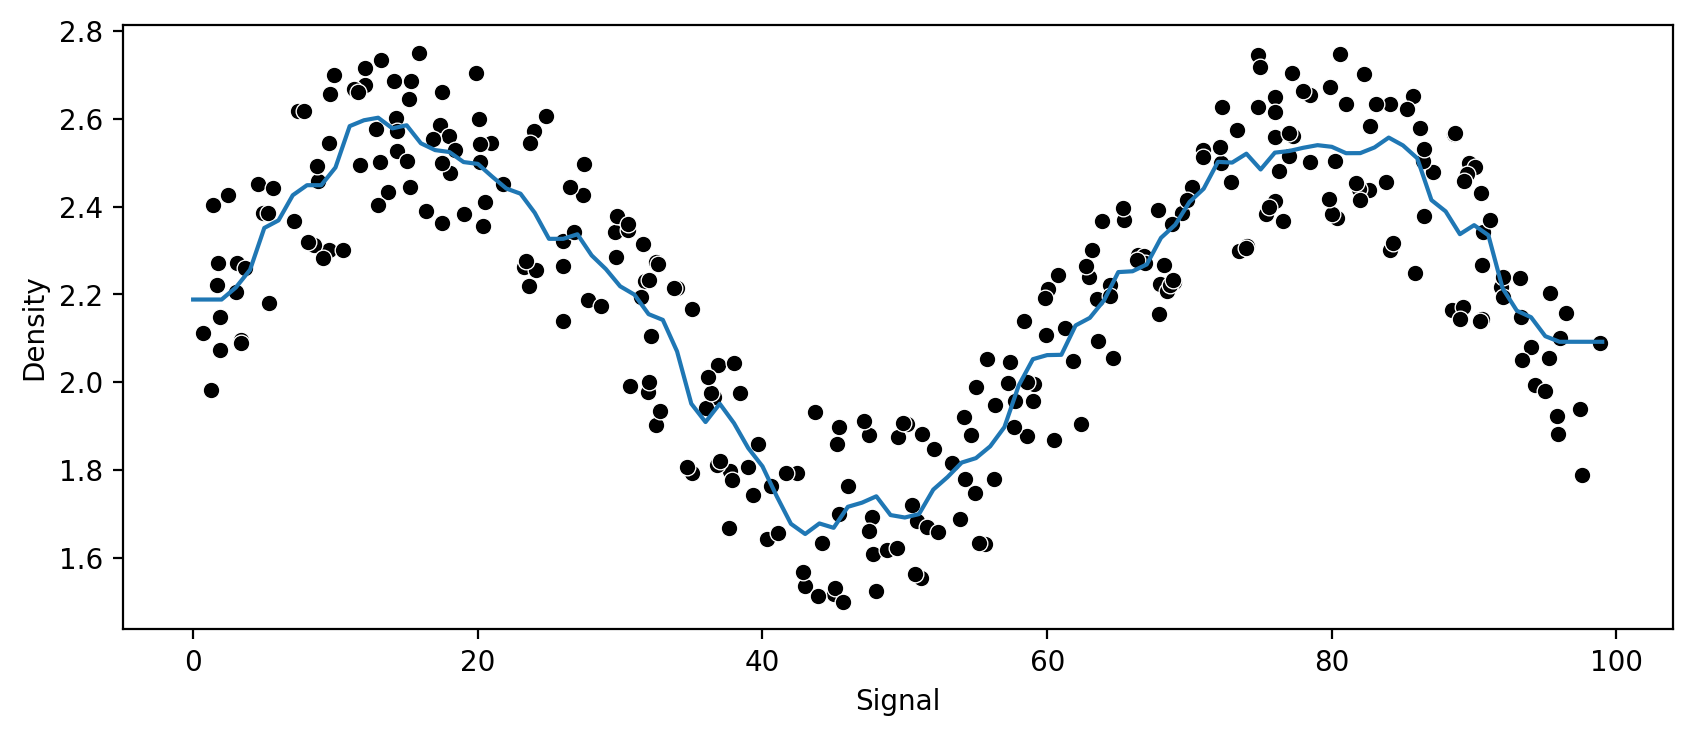

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
test_error_rates=[]
k_values = [1,5,10]
for n in k_values:
    knn_model =  KNeighborsRegressor(n_neighbors=n)
    run_model(knn_model,X_train, y_train,X_test,y_test)

MAE: 0.2369211828242142
RMSE: 0.29280140172610514


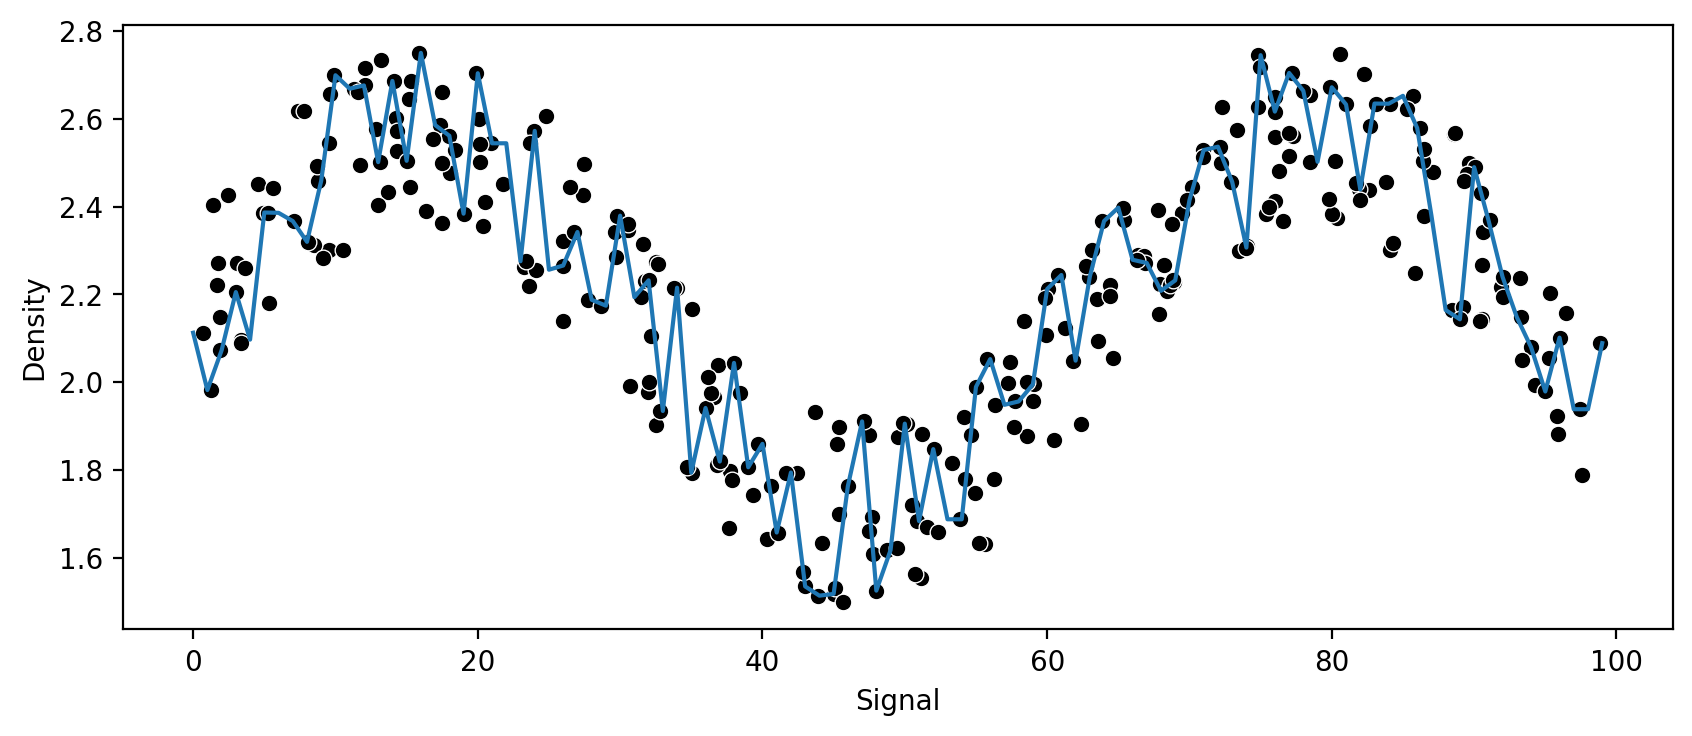

In [23]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
run_model(dtr_model,X_train, y_train,X_test,y_test)

MAE: 0.2369211828242142
RMSE: 0.29280140172610514


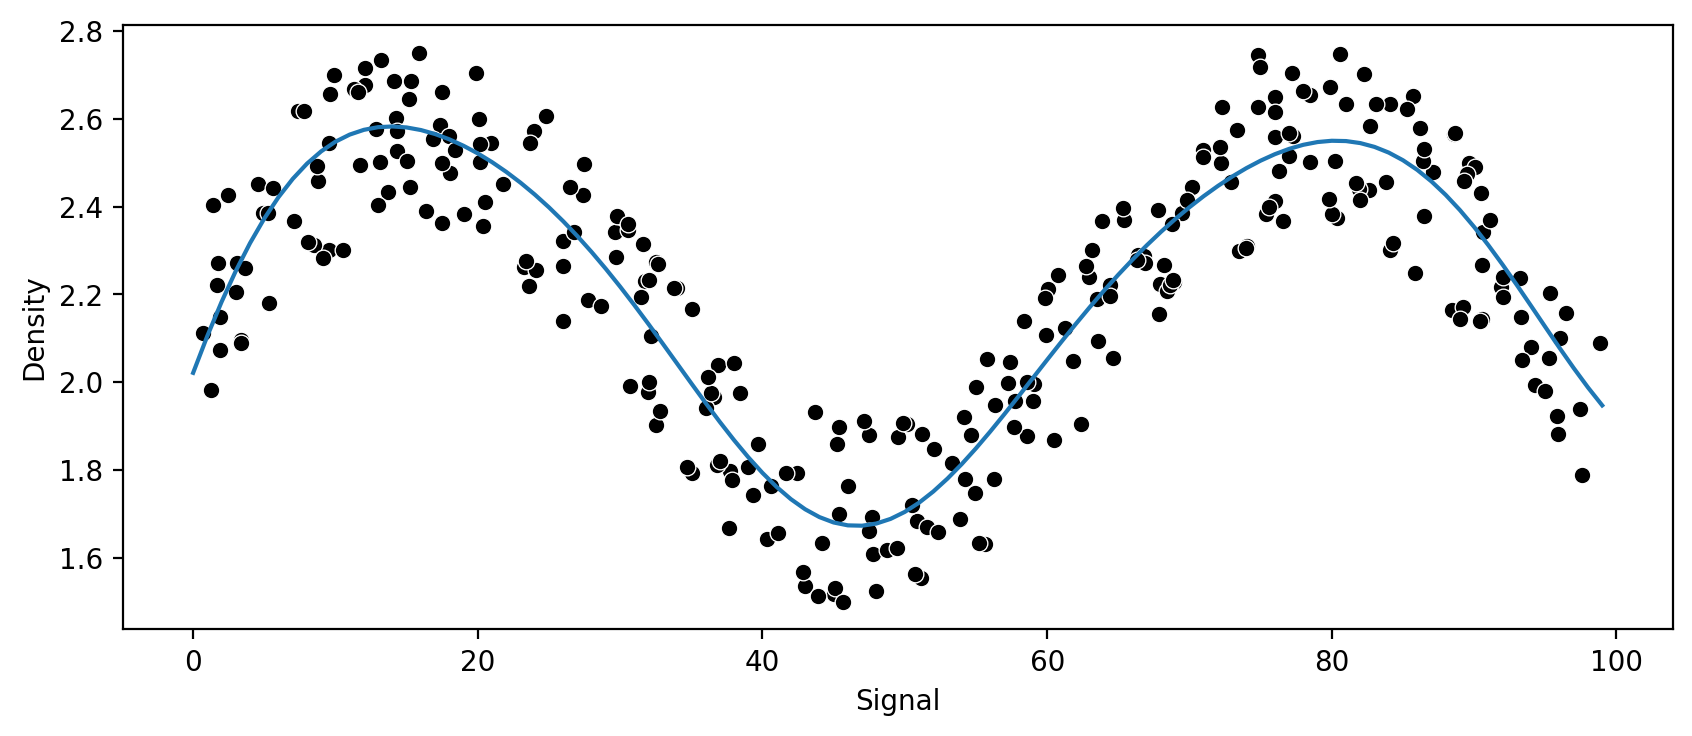

In [8]:
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
svr_model =SVR()
param_grid = {'C':[0.001,0.01,0.1,1,5,10,50,100],'gamma':['scale','auto']}
grid = GridSearchCV(svr_model,param_grid)
run_model(grid,X_train, y_train,X_test,y_test)

MAE: 0.2369211828242142
RMSE: 0.29280140172610514


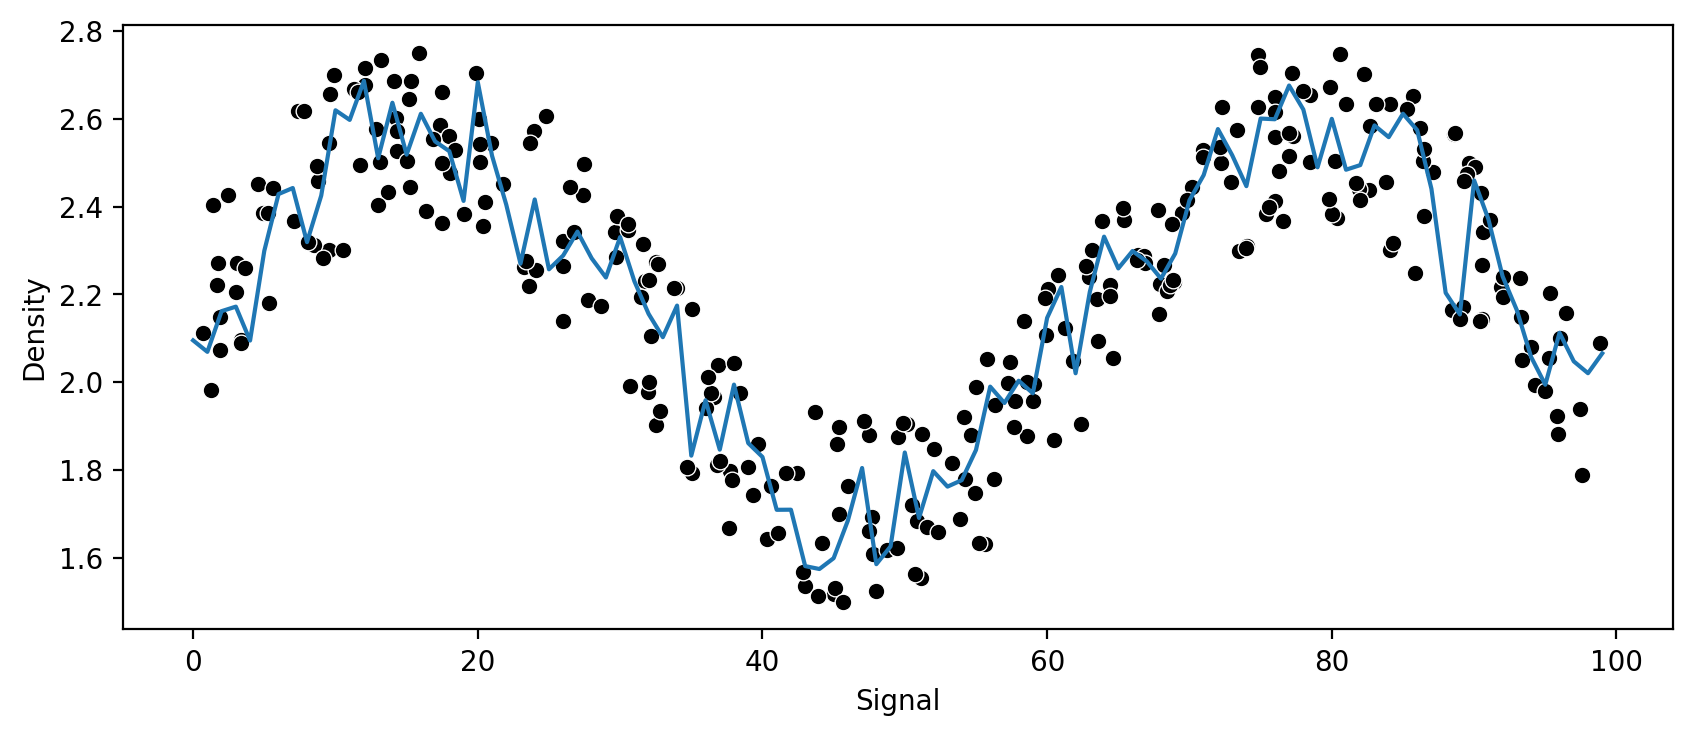

In [7]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 10, max_features ='auto', random_state = 101)
run_model(rfr,X_train, y_train,X_test,y_test)